In [1]:
#numpy basis
import numpy as np
print(np.__version__)

1.18.1


In [2]:
import numpy as np
my_arr=np.array([[10,20,30],[40,50,60]])
print(my_arr[1][2])
my_arr

60


array([[10, 20, 30],
       [40, 50, 60]])

In [3]:
type(my_arr)

numpy.ndarray

In [4]:
print(np.sum(my_arr))
np.sum(my_arr[1])

210


150

In [5]:
#matplot basis
import matplotlib.pyplot as plt

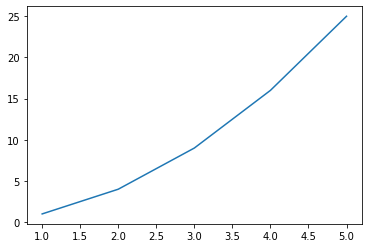

In [6]:
#plot([x],[y])
plt.plot([1,2,3,4,5],[1,4,9,16,25])
plt.show() #plot으로 전달하고 show로 출력

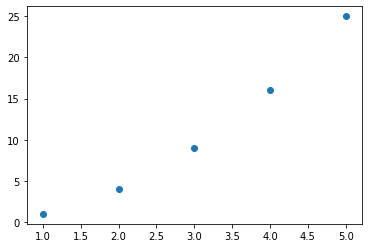

In [7]:
plt.scatter([1,2,3,4,5],[1,4,9,16,25])

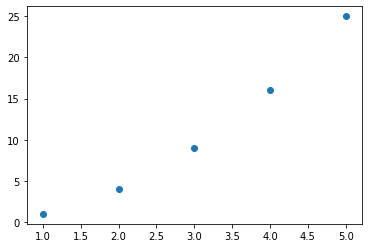

In [8]:
plt.scatter([1,2,3,4,5],[1,4,9,16,25])
plt.show()# plt.show()는 그래프를 조금 더 깔끔하게 그려준다!

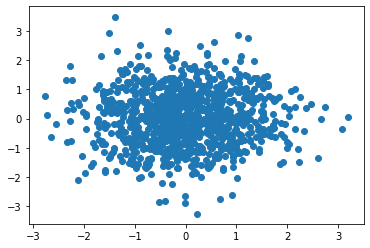

In [9]:
x=np.random.randn(1000)#원소가 1000개인 numpy배열이다.
y=np.random.randn(1000)
plt.scatter(x,y)
plt.show()

In [10]:
#sklearn에서 당뇨병 data불러와서 diabate라는 변수에 저장.
from sklearn.datasets import load_diabetes
diabetes=load_diabetes()

In [11]:
print(diabetes.data.shape,diabetes.target.shape)
# 442명의 사람(샘플)의 10개의 특성 

(442, 10) (442,)


In [12]:
print(diabetes.data)
print(diabetes.target)

[[ 0.03807591  0.05068012  0.06169621 ... -0.00259226  0.01990842
  -0.01764613]
 [-0.00188202 -0.04464164 -0.05147406 ... -0.03949338 -0.06832974
  -0.09220405]
 [ 0.08529891  0.05068012  0.04445121 ... -0.00259226  0.00286377
  -0.02593034]
 ...
 [ 0.04170844  0.05068012 -0.01590626 ... -0.01107952 -0.04687948
   0.01549073]
 [-0.04547248 -0.04464164  0.03906215 ...  0.02655962  0.04452837
  -0.02593034]
 [-0.04547248 -0.04464164 -0.0730303  ... -0.03949338 -0.00421986
   0.00306441]]
[151.  75. 141. 206. 135.  97. 138.  63. 110. 310. 101.  69. 179. 185.
 118. 171. 166. 144.  97. 168.  68.  49.  68. 245. 184. 202. 137.  85.
 131. 283. 129.  59. 341.  87.  65. 102. 265. 276. 252.  90. 100.  55.
  61.  92. 259.  53. 190. 142.  75. 142. 155. 225.  59. 104. 182. 128.
  52.  37. 170. 170.  61. 144.  52. 128.  71. 163. 150.  97. 160. 178.
  48. 270. 202. 111.  85.  42. 170. 200. 252. 113. 143.  51.  52. 210.
  65. 141.  55. 134.  42. 111.  98. 164.  48.  96.  90. 162. 150. 279.
  92.  83. 

In [13]:
diabetes.data[0:3]

array([[ 0.03807591,  0.05068012,  0.06169621,  0.02187235, -0.0442235 ,
        -0.03482076, -0.04340085, -0.00259226,  0.01990842, -0.01764613],
       [-0.00188202, -0.04464164, -0.05147406, -0.02632783, -0.00844872,
        -0.01916334,  0.07441156, -0.03949338, -0.06832974, -0.09220405],
       [ 0.08529891,  0.05068012,  0.04445121, -0.00567061, -0.04559945,
        -0.03419447, -0.03235593, -0.00259226,  0.00286377, -0.02593034]])

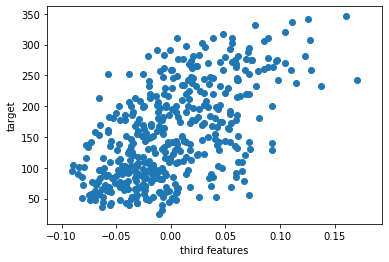

In [14]:
import matplotlib.pyplot as plt
plt.scatter(diabetes.data[:,2],diabetes.target)
plt.xlabel('third features')
plt.ylabel('target')
plt.show()

In [15]:
#훈련 데이터 준비하기
#매번 긴 이름 쓰기 번거로우니 변수이름 지정
x=diabetes.data[:,2]
y=diabetes.target

In [16]:
#w,b 실제로 찾아보기
w=1.0
b=1.0

In [17]:
#예측치
y_h=x[0]*w+b
print(y_h)

1.0616962065186886


In [18]:
#target data
print(y[0])

151.0


In [19]:
#w의 방향성 찾기
w_inc=w+0.1
y_h_inc=x[0]*w_inc+b
print(y_h_inc)

1.0678658271705574


In [20]:
#w변화에 따른 예측값 변화율
w_rate=(y_h_inc-y_h)/(w_inc-w)
print(w_rate)

0.061696206518688734


In [21]:
#원하는 target에 맞게 w를 수정하는 방법은 w에 변화율을 더해가는 것이다.
w_new=w+w_rate
print(w_new)

1.0616962065186888


In [22]:
#bias 조절
b_inc=b+0.1
y_h_inc=x[0]*w+b_inc
y_h_inc

1.1616962065186887

In [23]:
b_rate=(y_h_inc-y_h)/(b_inc-b)
b_rate
#절편이니 당연히 b변화량= y^변화량

1.0

In [24]:
b_new=b+1
b_new

2.0

In [25]:
err=y[0]-y_h
w_new=w+w_rate*err
b_new=b+1*err
print(w_new,b_new)

10.250624555904514 150.9383037934813


In [26]:
#두번째 sample
y_h=x[1]*w_new+b_new
err=y[1]-y_h
w_rate=x[1]
w_new=w_new+w_rate*err
b_new=b_new+err
(w_new,b_new)

(14.132317616381767, 75.52764127612664)

In [27]:
#전체 sample 반복

for x_i,y_i in zip(x,y):
  
    y_h=x_i*w+b
    err=y_i-y_h
    w_rate=x_i
    w=w+w_rate*err
    b=b+1*err
print(w,b)
    

587.8654539985689 99.40935564531424


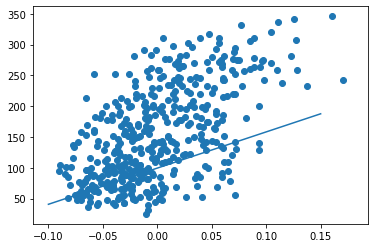

In [28]:
plt.scatter(x,y)
pt1=(-0.1,-0.1*w+b)
pt2=(0.15,0.15*w+b)
plt.plot([pt1[0],pt2[0]],[pt1[1],pt2[1]])
plt.show()

In [29]:
#epoch=100(모든 데이터에 대한 경사하강법 시행의 단위:epoch)
for i in range(1,100):
    for x_i,y_i in zip(x,y):
        y_h=x_i*w+b
        err=y_i-y_h
        w_rate=x_i
        w=w+w_rate*err
        b=b+1*err
print(w,b)

913.5973364345905 123.39414383177204


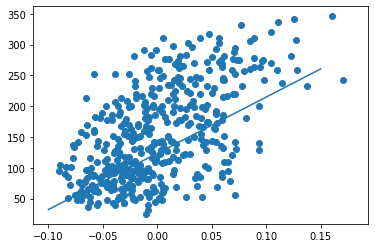

In [30]:
plt.scatter(x,y)
pt1=(-0.1,-0.1*w+b)
pt2=(0.15,0.15*w+b)
plt.plot([pt1[0],pt2[0]],[pt1[1],pt2[1]])
plt.show()

In [31]:
x_new=0.18
y_pred=x_new*w+b
print(y_pred)

287.8416643899983


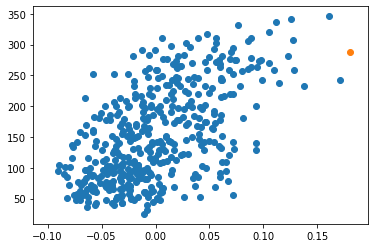

In [32]:
plt.scatter(x,y)
plt.scatter(x_new,y_pred)
plt.show()

In [38]:
class Neuron:
    
    def __init__(self):
        self.w=1.0
        self.b=1.0
    def forpass(self,x):
        y_hat=x*self.w+self.b
        return y_hat
    def backprop(self,x,err):
        w_grad=x*err
        b_grad=1*err
        return w_grad,b_grad
    def fit(self,x,y,epochs=100):
        for i in range(epochs):
            for x_i,y_i in zip(x,y):
                y_hat=self.forpass(x_i)
                err=-(y_i-y_hat)
                w_grad,b_grad=self.backprop(x_i,err)
                self.w-=w_grad
                self.b-=b_grad

In [39]:
a=Neuron()
a.fit(x,y)

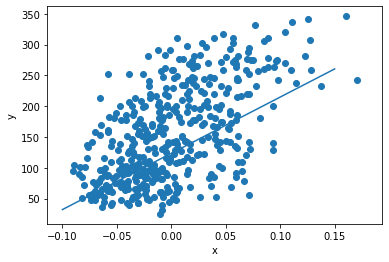

In [40]:
plt.scatter(x,y)
pt1=(-0.1,-0.1*a.w+a.b)
pt2=(0.15,0.15*a.w+a.b)
plt.plot([pt1[0],pt2[0]],[pt1[1],pt2[1]])
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [3]:
from sklearn.datasets import load_breast_cancer
cancer=load_breast_cancer()

In [4]:
print(cancer.data.shape,cancer.target.data.shape)

(569, 30) (569,)


In [5]:
import matplotlib.pyplot as plt
import numpy as np

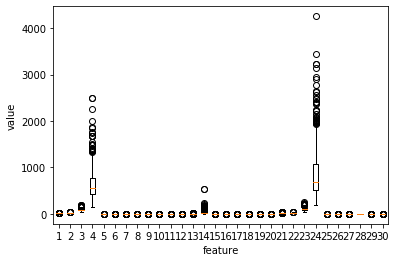

In [6]:
plt.boxplot(cancer.data)
plt.xlabel('feature')
plt.ylabel('value')
plt.show()

In [7]:
cancer.feature_names[[3,13,23]]

array(['mean area', 'area error', 'worst area'], dtype='<U23')

In [8]:
np.unique(cancer.target,return_counts=True)

(array([0, 1]), array([212, 357], dtype=int64))

In [9]:
x=cancer.data
y=cancer.target

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
x_train, x_test, y_train, y_test=train_test_split(x,y,stratify=y,test_size=0.2,random_state=42)
print(x_train.shape,x_test.shape)

(455, 30) (114, 30)


In [12]:
np.unique(y_test, return_counts=True)

(array([0, 1]), array([42, 72], dtype=int64))

In [19]:
class Logisticunit:
    def __init__(self):
        self.w=None
        self.b=None
    def forpass(self,x): #넣어주는 x는 array이다.
        z=np.sum(x*self.w)+self.b
        return z
    def backprop(self,x,err):
        w_grad=x*err
        b_grad=1*err
        return w_grad, b_grad 
    def activation(self,z):
        a=1/(1+np.exp(-z))
        return a
    def fit(self,x,y,epochs=100):
        self.w=np.ones(x.shape[1])
        self.b=0
        for i in range(epochs):
            for x_i,y_i in zip(x,y):
                z=self.forpass(x_i)
                a=self.activation(z)
                err=-(y_i-a)
                w_grad,b_grad=self.backprop(x_i,err)
                self.w-=w_grad
              
                self.b-=b_grad
    def predict(self,x):
        z=[self.forpass(x_i) for x_i in x]
        a=self.activation(z)
        return a>0.5        

In [20]:
neuron=Logisticunit()
neuron.fit(x_train,y_train)

C:\Users\users\lib\site-packages\ipykernel_launcher.py:13: RuntimeWarning: overflow encountered in exp
  del sys.path[0]


In [21]:
np.mean(neuron.predict(x_test)==y_test)

TypeError: bad operand type for unary -: 'list'

In [104]:
class singleLayer:
    
    def __init__(self):
        self.w=None
        self.b=None
        self.losses=[]
    def forpass(self,x): #넣어주는 x는 array이다.
        z=np.sum(x*self.w)+self.b
        return z
    def backprop(self,x,err):
        w_grad=x*err
        b_grad=1*err
        return w_grad, b_grad 
    def activation(self,z):
        a=1/(1+np.exp(-z))
        return a
    def fit(self,x,y,epochs=100):
        self.w=np.ones(x.shape[1])
        self.b=0
        for i in range(epochs):
            loss=0
            indexes=np.random.permutation(np.arange(len(x)))
            for i in indexes:
                z=self.forpass(x[i])
                a=self.activation(z)
                err=-(y[i]-a)
                w_grad,b_grad=self.backprop(x[i],err)
                self.w-=w_grad
                self.b-=b_grad
                a=np.clip(a,1e-10,1-1e-10)
                loss+=-(y[i]*np.log(a)+(1-y[i])*np.log(1-a))
            self.losses.append(loss/len(y))         
    def predict(self,x):
        z=[self.forpass(x_i) for x_i in x]
        return np.array(z)>0
    def score(self,x,y):
        return np.mean(self.predict(x)==y)

In [107]:
layer=singleLayer()
layer.fit(x_train, y_train)
layer.score(x_test, y_test)

C:\Users\users\lib\site-packages\ipykernel_launcher.py:15: RuntimeWarning: overflow encountered in exp
  from ipykernel import kernelapp as app


0.9035087719298246

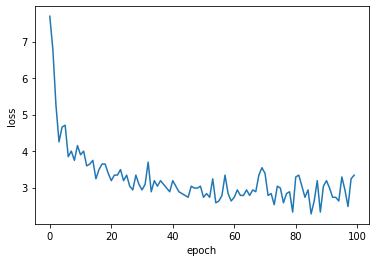

In [108]:
plt.plot(layer.losses)
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

In [111]:
from sklearn.linear_model import SGDClassifier
sgd=SGDClassifier(loss='log',max_iter=100,tol=1e-3,random_state=42)

In [112]:
sgd.fit(x_train, y_train)
sgd.score(x_test, y_test)

0.8333333333333334

In [113]:
sgd.predict(x_test[0:10])

array([0, 1, 0, 0, 0, 0, 1, 0, 0, 0])

In [3]:
#chapter.5
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
cancer=load_breast_cancer()
x=cancer.data
y=cancer.target
x_train_all, x_test, y_train_all, y_test=train_test_split(x,y,stratify=y,test_size=0.2,random_state=42)

In [4]:
from sklearn.linear_model import SGDClassifier
sgd=SGDClassifier(loss='log',random_state=42)
sgd.fit(x_train_all,y_train_all)
sgd.score(x_test, y_test)

0.8333333333333334

In [5]:
from sklearn.linear_model import SGDClassifier
sgd=SGDClassifier(loss='hinge',random_state=42)
sgd.fit(x_train_all,y_train_all)
sgd.score(x_test, y_test)

0.9385964912280702

In [6]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
cancer=load_breast_cancer()
x=cancer.data
y=cancer.target
x_train_all, x_test, y_train_all, y_test=train_test_split(x,y,stratify=y,test_size=0.2,random_state=42)
x_train, x_val,y_train,y_val=train_test_split(x_train_all,y_train_all,stratify=y_train_all,test_size=0.2,random_state=42)
print(x_train.shape,x_val.shape)

(364, 30) (91, 30)


In [7]:
sgd=SGDClassifier(loss='log',random_state=42)
sgd.fit(x_train, y_train)
sgd.score(x_val, y_val)

0.6923076923076923

['mean perimeter' 'mean area']


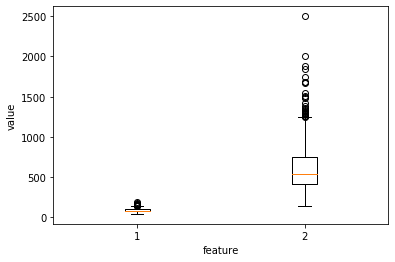

In [8]:
import matplotlib.pyplot as plt
import numpy as np
print(cancer.feature_names[[2,3]])
plt.boxplot(x_train[:,2:4])
plt.xlabel('feature')
plt.ylabel('value')
plt.show()

In [13]:
class singleLayer:
    
    def __init__(self,learning_rate=0.1):
        self.w=None
        self.b=None
        self.losses=[]
        self.w_history=[]
        self.lr=learning_rate
    def forpass(self,x): #넣어주는 x는 array이다.
        z=np.sum(x*self.w)+self.b
        return z
    def backprop(self,x,err):
        w_grad=x*err
        b_grad=1*err
        return w_grad, b_grad 
    def activation(self,z):
        a=1/(1+np.exp(-z))
        return a
    def fit(self,x,y,epochs=100):
        self.w=np.ones(x.shape[1])
        self.b=0
        for i in range(epochs):
            loss=0
            indexes=np.random.permutation(np.arange(len(x)))
            for i in indexes:
                z=self.forpass(x[i])
                a=self.activation(z)
                err=-(y[i]-a)
                w_grad,b_grad=self.backprop(x[i],err)
                self.w-=w_grad*self.lr
                self.b-=b_grad
                self.w_history.append(self.w.copy())
                a=np.clip(a,1e-10,1-1e-10)
                loss+=-(y[i]*np.log(a)+(1-y[i])*np.log(1-a))
            self.losses.append(loss/len(y))         
    def predict(self,x):
        z=[self.forpass(x_i) for x_i in x]
        return np.array(z)>0
    def score(self,x,y):
        return np.mean(self.predict(x)==y)

In [14]:
layer1=singleLayer()
layer1.fit(x_train, y_train)
print(layer1.score(x_val, y_val))
layer1.w_history

C:\Users\users\lib\site-packages\ipykernel_launcher.py:17: RuntimeWarning: overflow encountered in exp


0.9120879120879121


[array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]),
 array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]),
 array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]),
 array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]),
 array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]),
 array([ -0.176    ,  -0.814    ,  -6.5      , -42.11     ,   0.990032 ,
          0.994086 ,   0.997315 ,   0.996485 ,   0.98381  ,   0.993713 ,
          0.9355   ,   0.7895   ,   0.5862   ,  -3.911    ,   0.9994404,
          0.998995 ,   0.998728 ,   0.998568 ,   0.998425 ,   0.9997242,
         -0.336   

In [15]:
class singleLayer2:
    
    def __init__(self,learning_rate=0.1):
        self.w=None
        self.b=None
        self.losses=[]
        self.w_history=[]
        self.lr=learning_rate
    def forpass(self,x): #넣어주는 x는 array이다.
        z=np.sum(x*self.w)+self.b
        return z
    def backprop(self,x,err):
        w_grad=x*err
        b_grad=1*err
        return w_grad, b_grad 
    def activation(self,z):
        a=1/(1+np.exp(-z))
        return a
    def fit(self,x,y,epochs=100):
        self.w=np.ones(x.shape[1])
        self.b=0
        for i in range(epochs):
            loss=0
            indexes=np.random.permutation(np.arange(len(x)))
            for i in indexes:
                z=self.forpass(x[i])
                a=self.activation(z)
                err=-(y[i]-a)
                w_grad,b_grad=self.backprop(x[i],err)
                self.w-=w_grad*self.lr
                self.b-=b_grad
                self.w_history.append(self.w)
                a=np.clip(a,1e-10,1-1e-10)
                loss+=-(y[i]*np.log(a)+(1-y[i])*np.log(1-a))
            self.losses.append(loss/len(y))         
    def predict(self,x):
        z=[self.forpass(x_i) for x_i in x]
        return np.array(z)>0
    def score(self,x,y):
        return np.mean(self.predict(x)==y)

In [16]:
layer1=singleLayer2()
layer1.fit(x_train, y_train)
print(layer1.score(x_val, y_val))
layer1.w_history

C:\Users\users\lib\site-packages\ipykernel_launcher.py:17: RuntimeWarning: overflow encountered in exp


0.9120879120879121


[array([ 4.57606167e+02,  1.21756741e+02,  2.33502552e+03,  6.05328724e+02,
         2.64020776e+00, -1.12875147e+01, -2.15078113e+01, -7.66924597e+00,
         4.11029186e+00,  2.87402074e+00,  4.97632127e+00, -1.29295224e+01,
        -3.94890002e+01, -8.80795878e+02,  8.68622883e-01, -2.66260089e+00,
        -4.23870850e+00,  3.94739601e-02,  6.51245461e-01,  7.39933160e-01,
         4.74989779e+02, -1.30353422e+02,  2.03854901e+03, -9.76360081e+02,
         1.58298713e+00, -4.38718365e+01, -6.14587151e+01, -1.39059299e+01,
         1.99002279e-02, -2.28087169e-01]),
 array([ 4.57606167e+02,  1.21756741e+02,  2.33502552e+03,  6.05328724e+02,
         2.64020776e+00, -1.12875147e+01, -2.15078113e+01, -7.66924597e+00,
         4.11029186e+00,  2.87402074e+00,  4.97632127e+00, -1.29295224e+01,
        -3.94890002e+01, -8.80795878e+02,  8.68622883e-01, -2.66260089e+00,
        -4.23870850e+00,  3.94739601e-02,  6.51245461e-01,  7.39933160e-01,
         4.74989779e+02, -1.30353422e+02,  2

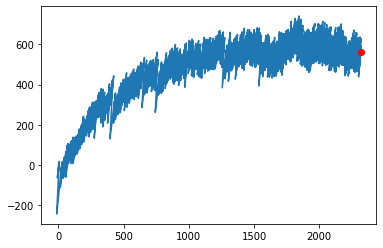

In [10]:
w2=[]
w3=[]
for w in layer1.w_history:
    w2.append(w[2])
    w3.append(w[3])
plt.plot(w2,w3)
plt.plot(w2[-1],w3[-1],'ro')
plt.show()

In [11]:
x=([[1,2,3],[4,5,6],[7,8,9],[10,11,12]])
xs=np.array(x)
print(np.mean(xs))
print(np.mean(xs,axis=0))
print(np.std(xs))
print(np.std(xs,axis=0))

6.5
[5.5 6.5 7.5]
3.452052529534663
[3.35410197 3.35410197 3.35410197]


In [12]:
train_mean=np.mean(x_train,axis=0)
train_std=np.std(x_train, axis=0)
x_train_scaled=(x_train-train_mean)/train_std
x_train_scaled

array([[ 0.21529445, -0.3313719 ,  0.17983103, ..., -0.48870759,
         1.0446075 , -0.6393202 ],
       [-0.6557398 , -1.14919128, -0.71043609, ..., -0.49139007,
         0.27379602, -0.9632616 ],
       [ 0.18967579,  0.55160342,  0.16625487, ...,  1.00632788,
         1.19598931,  1.3439391 ],
       ...,
       [ 0.11281983, -0.88856752,  0.10125385, ...,  0.65611522,
        -0.35953605, -0.42335927],
       [ 0.96108195,  1.44356576,  0.94585569, ..., -0.08901809,
        -2.0401831 , -0.8927216 ],
       [-0.74398184, -0.41000838, -0.73429722, ..., -0.77275241,
        -0.52482027, -0.19925911]])

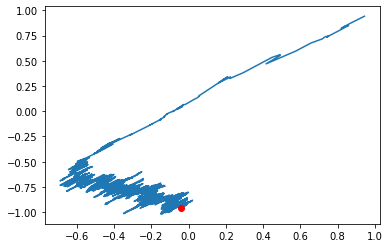

In [13]:
layer2=singleLayer()
layer2.fit(x_train_scaled, y_train)
w2=[]
w3=[]
for w in layer2.w_history:
    w2.append(w[2])
    w3.append(w[3])
plt.plot(w2,w3)
plt.plot(w2[-1],w3[-1],'ro')
plt.show()

In [14]:
layer2.score(x_val, y_val)

0.37362637362637363

In [15]:
val_mean=np.mean(x_val, axis=0)
val_std=np.std(x_val, axis=0)
x_val_scaled=(x_val-val_mean)/val_std
layer2.score(x_val_scaled,y_val)

0.9560439560439561

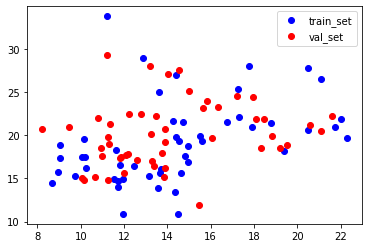

In [16]:
plt.plot(x_train[:50,0],x_train[:50,1],'bo')
plt.plot(x_val[:50,0],x_val[:50,1],'ro')
plt.legend(['train_set','val_set'])
plt.show()

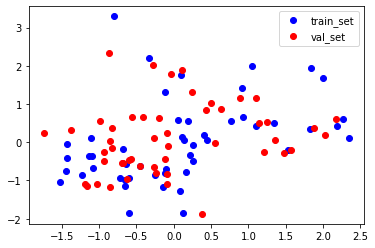

In [17]:
plt.plot(x_train_scaled[:50,0],x_train_scaled[:50,1],'bo')
plt.plot(x_val_scaled[:50,0],x_val_scaled[:50,1],'ro')
plt.legend(['train_set','val_set'])
plt.show()

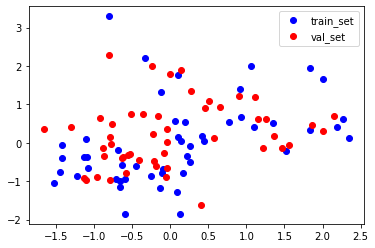

In [18]:
x_val_scaled=(x_val-train_mean)/train_std
plt.plot(x_train_scaled[:50,0], x_train_scaled[:50,1],'bo')
plt.plot(x_val_scaled[:50,0],x_val_scaled[:50,1],'ro')
plt.legend(['train_set','val_set'])
plt.show()

In [19]:
layer2.score(x_val_scaled, y_val)


0.967032967032967

In [20]:
class singleLayer:
    
    def __init__(self,learning_rate=0.1):
        self.w=None
        self.b=None
        self.losses=[]
        self.val_losses=[]
        self.w_history=[]
        self.lr=learning_rate
    def forpass(self,x): #넣어주는 x는 array이다.
        z=np.sum(x*self.w)+self.b
        return z
    def backprop(self,x,err):
        w_grad=x*err
        b_grad=1*err
        return w_grad, b_grad 
    def activation(self,z):
        a=1/(1+np.exp(-z))
        return a
    def fit(self,x,y,epochs=100,x_val=None, y_val=None):
        self.w=np.ones(x.shape[1])
        self.b=0
        for i in range(epochs):
            loss=0
            indexes=np.random.permutation(np.arange(len(x)))
            for i in indexes:
                z=self.forpass(x[i])
                a=self.activation(z)
                err=-(y[i]-a)
                w_grad,b_grad=self.backprop(x[i],err)
                self.w-=w_grad*self.lr
                self.b-=b_grad
                self.w_history.append(self.w.copy())
                a=np.clip(a,1e-10,1-1e-10)
                loss+=-(y[i]*np.log(a)+(1-y[i])*np.log(1-a))
            self.losses.append(loss/len(y))  
            self.update_val_loss(x_val,y_val)
    def predict(self,x):
        z=[self.forpass(x_i) for x_i in x]
        return np.array(z)>0
    def score(self,x,y):
        return np.mean(self.predict(x)==y)
    def update_val_loss(self,x_val,y_val):
        if x_val is None:
            return
        val_loss=0
        for i in range(len(x_val)):
            z=self.forpass(x_val[i])
            a=self.activation(z)
            a=np.clip(a,1e-10,1-1e-10)
            val_loss+=-(y_val[i]*np.log(a)+(1-y_val[i])*np.log(1-a))
        self.val_losses.append(val_loss/len(y_val))

In [21]:
layer3=singleLayer()
layer3.fit(x_train_scaled,y_train,x_val=x_val_scaled,y_val=y_val)

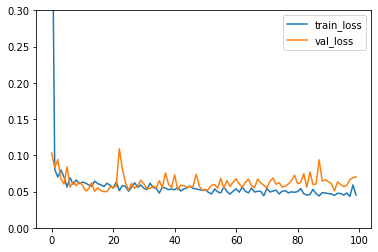

In [22]:
plt.ylim(0,0.3)
plt.plot(layer3.losses)
plt.plot(layer3.val_losses)
plt.legend(['train_loss','val_loss'])
plt.show()

In [23]:
layer4=singleLayer()
layer4.fit(x_train_scaled,y_train,epochs=20)
layer4.score(x_val_scaled,y_val)

0.978021978021978

In [24]:
class singleLayer:
    
    def __init__(self,learning_rate=0.1,l1=0,l2=0):
        self.w=None
        self.b=None
        self.losses=[]
        self.val_losses=[]
        self.w_history=[]
        self.lr=learning_rate
        self.l1=l1
        self.l2=l2
    def forpass(self,x): #넣어주는 x는 array이다.
        z=np.sum(x*self.w)+self.b
        return z
    def backprop(self,x,err):
        w_grad=x*err
        b_grad=1*err
        return w_grad, b_grad 
    def activation(self,z):
        a=1/(1+np.exp(-z))
        return a
    def fit(self,x,y,epochs=100,x_val=None, y_val=None):
        self.w=np.ones(x.shape[1])
        self.b=0
        for i in range(epochs):
            loss=0
            indexes=np.random.permutation(np.arange(len(x)))
            for i in indexes:
                z=self.forpass(x[i])
                a=self.activation(z)
                err=-(y[i]-a)
                w_grad,b_grad=self.backprop(x[i],err)
                w_grad+=self.l1*np.sign(self.w)+self.l2*self.w
                self.w-=w_grad*self.lr
                self.b-=b_grad
                self.w_history.append(self.w.copy())
                a=np.clip(a,1e-10,1-1e-10)
                loss+=-(y[i]*np.log(a)+(1-y[i])*np.log(1-a))
            self.losses.append(loss/len(y)+self.reg_loss())  
            self.update_val_loss(x_val,y_val)
    def predict(self,x):
        z=[self.forpass(x_i) for x_i in x]
        return np.array(z)>0
    def score(self,x,y):
        return np.mean(self.predict(x)==y)
    def reg_loss(self):
        return self.l1*np.sum(np.abs(self.w))+self.l2/2*np.sum(self.w**2)
    def update_val_loss(self,x_val,y_val):
        if x_val is None:
            return
        val_loss=0
        for i in range(len(x_val)):
            z=self.forpass(x_val[i])
            a=self.activation(z)
            a=np.clip(a,1e-10,1-1e-10)
            val_loss+=-(y_val[i]*np.log(a)+(1-y_val[i])*np.log(1-a))
        self.val_losses.append(val_loss/len(y_val)+self.reg_loss())

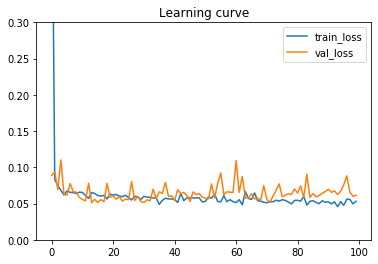

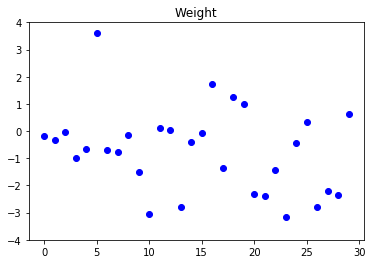

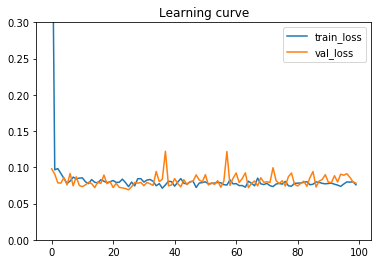

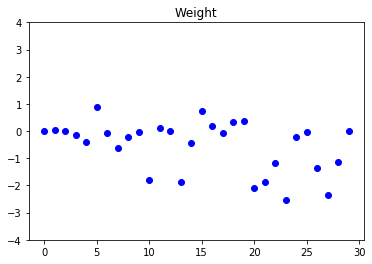

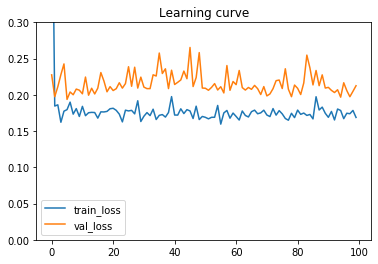

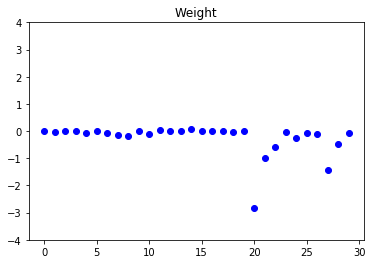

In [25]:
l1_list=[0.0001,0.001,0.01]
for l1 in l1_list:
    lyr=singleLayer(l1=l1)
    lyr.fit(x_train_scaled,y_train,x_val=x_val_scaled,y_val=y_val)
    
    plt.plot(lyr.losses)
    plt.plot(lyr.val_losses)
    plt.title("Learning curve".format(l1))
    plt.legend(['train_loss','val_loss'])
    plt.ylim(0,0.3)
    plt.show()
    
    plt.plot(lyr.w,'bo')
    plt.title("Weight".format(l1))
    plt.ylim(-4,4)
    plt.show()

In [26]:
layer5=singleLayer(l1=0.001)
layer5.fit(x_train_scaled,y_train,epochs=20)
layer5.score(x_val_scaled,y_val)

0.967032967032967

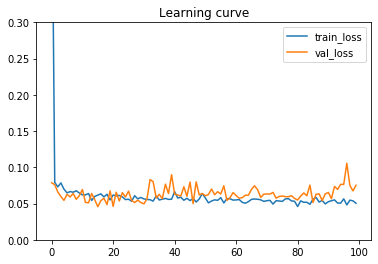

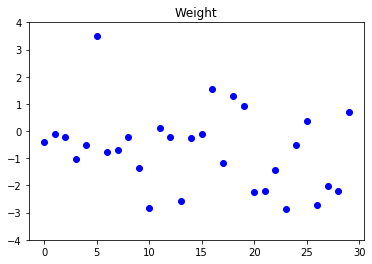

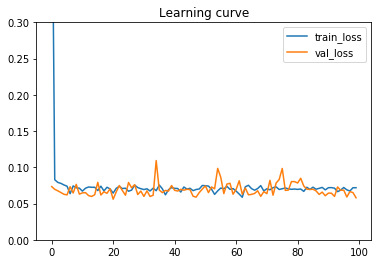

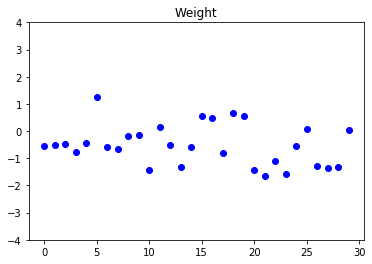

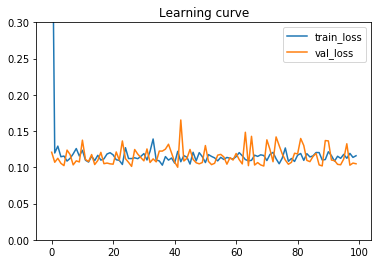

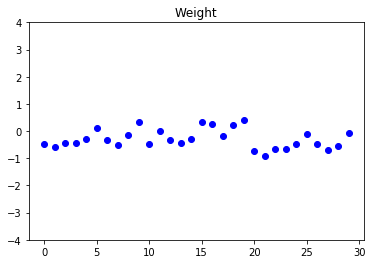

In [27]:
l2_list=[0.0001,0.001,0.01]
for l2 in l2_list:
    lyr=singleLayer(l2=l2)
    lyr.fit(x_train_scaled,y_train,x_val=x_val_scaled,y_val=y_val)
    
    plt.plot(lyr.losses)
    plt.plot(lyr.val_losses)
    plt.title("Learning curve".format(l1))
    plt.legend(['train_loss','val_loss'])
    plt.ylim(0,0.3)
    plt.show()
    
    plt.plot(lyr.w,'bo')
    plt.title("Weight".format(l1))
    plt.ylim(-4,4)
    plt.show()

In [28]:
layer6=singleLayer(l2=0.01)
layer6.fit(x_train_scaled,y_train,epochs=20)
layer6.score(x_val_scaled,y_val)

0.978021978021978

In [29]:
np.sum(layer6.predict(x_val_scaled)==y_val)

89

In [30]:
sgd=SGDClassifier(loss='log',penalty='l2',alpha=0.001,random_state=42)
sgd.fit(x_train_scaled, y_train)
sgd.score(x_val_scaled, y_val)


0.978021978021978

In [32]:
len(x_train),len(x_train_all)

(364, 455)

In [34]:
validation_scores=[]
k=10
bins=len(x_train_all)//k
for i in range(k):
    start=i*bins
    end=(i+1)*bins
    val_fold=x_train_all[start:end]
    val_target=y_train_all[start:end]
    
    train_index=list(range(0,start))+list(range(end,len(x_train_all)))
    train_fold=x_train_all[train_index]
    train_target=y_train_all[train_index]
    
    train_mean=np.mean(train_fold,axis=0)
    train_std=np.std(train_fold,axis=0)
    train_fold_scaled=(train_fold-train_mean)/train_std
    val_fold_scaled=(val_fold-train_mean)/train_std
    
    lyr=singleLayer(l2=0.01)
    lyr.fit(train_fold_scaled,train_target,epochs=50)
    score=lyr.score(val_fold_scaled,val_target)
    validation_scores.append(score)
print(np.mean(validation_scores))

0.9711111111111113


In [35]:
from sklearn.model_selection import cross_validate
sgd=SGDClassifier(loss='log',penalty='l2',alpha=0.001,random_state=42)
scores=cross_validate(sgd,x_train_all,y_train_all,cv=10)
print(np.mean(scores['test_score']))

0.850096618357488


In [40]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
pipe=make_pipeline(StandardScaler(),sgd)
scores=cross_validate(pipe,x_train_all,y_train_all,cv=10,return_train_score=True)
print(np.mean(scores['test_score']))
print(np.mean(scores['train_score']))

0.9694202898550724
0.9875478561631581


In [18]:
print(cancer.feature_names[[1,2,3]])

['mean texture' 'mean perimeter' 'mean area']


In [20]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

cancer=load_breast_cancer()
x=cancer.data
y=cancer.target
x_train_all,x_test,y_train_all,y_test=train_test_split(x,y,stratify=y,test_size=0.2,random_state=42)
x_train,x_val,y_train,y_val=train_test_split(x_train_all,y_train_all,stratify=y_train_all,test_size=0.2,random_state=42)

In [49]:
class SingleLayer:
    def __init__(self, learning_rate=0.1, l1=0, l2=0):       
        self.w=None
        self.b=None
        self.losses=[] 
        self.val_losses=[]
        self.w_history=[]
        self.lr=learning_rate 
        self.l1=l1
        self.l2=l2
    def forpass(self,x): 
        z=np.dot(x,self.w)+self.b 
        return z
    def backprop(self,x,err):
        m=len(x)
        w_grad=np.dot(x.T,err)/m
        b_grad=np.sum(err)/m
        return w_grad, b_grad
    def activation(self,z):
        a=1/(1+np.exp(-z)) 
        return a
    def fit(self,x,y,epochs=100,x_val=None, y_val=None):
        y=y.reshape(-1,1) 
        y_val=y_val.reshape(-1,1) 
        m=len(x)
        self.w=np.ones((x.shape[1],1))
        self.b=0 
        self.w_history.append(self.w.copy())#가중치 기록
        for i in range (epochs):
            z=self.forpass(x) #정방형 계산
            a=self.activation(z) #활성화 함수 적용
            err=-(y-a) # 오차계산 
            w_grad, b_grad=self.backprop(x,err) #역방형 계산
            w_grad+=(self.l1*np.sign(self.w)+self.l2*self.w)/m
            self.w-=self.lr*w_grad #가중치 업데이트
            self.b-=b_grad #절편 업데이트
            self.w_history.append(self.w.copy())
            a=np.clip(a, 1e-10, 1-1e-10) 
            loss=np.sum(-(y*np.log(a)+(1-y)*np.log(1-a))) 
            self.losses.append((loss+self.reg_loss())/m) 
            self.update_val_loss(x_val,y_val)
    def update_val_loss(self,x_val, y_val):
        z=self.forpass(x_val)
        a=self.activation(z)
        a=np.clip(a, 1e-10, 1-1e-10)
        val_loss=np.sum(-(y_val*np.log(a)+(1-y_val)*np.log(1-a)))
        self.val_losses.append((val_loss+self.reg_loss())/len(y_val))
    def reg_loss(self):
        return self.l1*np.sum(np.abs(self.w))+self.l2/2*np.sum(self.w**2)
    def predict(self, x):
        z=self.forpass(x)
        return z>0
    def score(self, x, y):
        return np.mean(self.predict(x)==y.reshape(-1,1))

In [50]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(x_train)
x_train_scaled=scaler.transform(x_train)
x_val_scaled=scaler.transform(x_val)

In [51]:
single_layer=SingleLayer(l2=0.01)
single_layer.fit(x_train_scaled, y_train,x_val=x_val_scaled,y_val=y_val,epochs=10000)
single_layer.score(x_val_scaled,y_val)

0.978021978021978

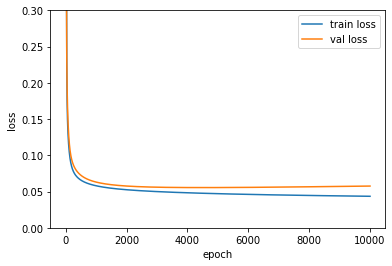

In [52]:

plt.ylim(0,0.3)
plt.plot(single_layer.losses)
plt.plot(single_layer.val_losses)
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train loss', 'val loss'])
plt.show()

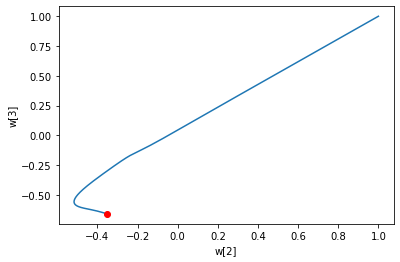

In [53]:
w2=[]
w3=[]
for w in single_layer.w_history:
    w2.append(w[2])
    w3.append(w[3])
plt.plot(w2,w3)
plt.plot(w2[-1],w3[-1],'ro')
plt.xlabel('w[2]')
plt.ylabel('w[3]')
plt.show()

In [54]:

class DualLayer(SingleLayer):
    def __init__(self, units=10, learning_rate=0.1, l1=0, l2=0):       
        self.units=units # 은닉층 뉴런 개수
        self.w1=None #은닉층 가중치
        self.b1=None #은닉층 절편
        self.w2=None #출력층 가중치
        self.b2=None #출력층 절편
        self.a1=None #은닉층 활성화 출력 
        self.losses=[] 
        self.val_losses=[]
        self.lr=learning_rate
        self.l1=l1
        self.l2=l2
    def forpass(self,x): 
        z1=np.dot(x,self.w1)+self.b1 
        self.a1=self.activation(z1)
        z2=np.dot(self.a1,self.w2)+self.b2 
        return z2
    def backprop(self,x,err):
        m=len(x)
        w2_grad=np.dot(self.a1.T,err)/m 
        b2_grad=np.sum(err)/m 
        err_to_hidden=np.dot(err,self.w2.T)*self.a1*(1-self.a1)
        w1_grad=np.dot(x.T,err_to_hidden)/m 
        b1_grad=np.sum(err_to_hidden,axis=0)/m 
        return w1_grad, b1_grad ,w2_grad, b2_grad
    def init_weights(self,n_features):
        self.w1=np.ones((n_features,self.units))
        self.b1=np.zeros(self.units)
        self.w2=np.ones((self.units, 1))
        self.b2=0 
    def fit(self,x,y,epochs=100,x_val=None, y_val=None):
        y=y.reshape(-1,1) 
        y_val=y_val.reshape(-1,1) 
        m=len(x)
        self.init_weights(x.shape[1])
        for i in range (epochs):
            a=self.training(x,y,m)
            a=np.clip(a, 1e-10, 1-1e-10) 
            loss=np.sum(-(y*np.log(a)+(1-y)*np.log(1-a))) 
            self.losses.append((loss+self.reg_loss())/m)
            self.update_val_loss(x_val,y_val)
    def training(self,x,y,m):
        z=self.forpass(x) 
        a=self.activation(z) 
        err=-(y-a) # 오차계산 
        w1_grad, b1_grad, w2_grad, b2_grad=self.backprop(x,err) 
        w1_grad+=(self.l1*np.sign(self.w1)+self.l2*self.w1)/m
        w2_grad+=(self.l1*np.sign(self.w2)+self.l2*self.w2)/m
        self.w1-=self.lr*w1_grad 
        self.b1-=self.lr*b1_grad 
        self.w2-=self.lr*w2_grad 
        self.b2-=self.lr*b2_grad 
        return a
    def update_val_loss(self,x_val, y_val):
        z=self.forpass(x_val) #정방형 계산
        a=self.activation(z)
        a=np.clip(a, 1e-10, 1-1e-10)
        val_loss=np.sum(-(y_val*np.log(a)+(1-y_val)*np.log(1-a)))
        self.val_losses.append((val_loss+self.reg_loss())/len(y_val))
    def reg_loss(self):
        return self.l1*(np.sum(np.abs(self.w1))+np.sum(np.abs(self.w2)))+\
                self.l2/2*(np.sum(self.w1**2)+np.sum(self.w2**2))
    def predict(self, x):
        z=self.forpass(x)
        return z>0
    def score(self, x, y):
        return np.mean(self.predict(x)==y.reshape(-1,1))

In [55]:
dual_layer=DualLayer(l2=0.01)
dual_layer.fit(x_train_scaled, y_train, x_val=x_val_scaled, y_val=y_val, epochs=20000)
dual_layer.score(x_val_scaled, y_val)

0.978021978021978

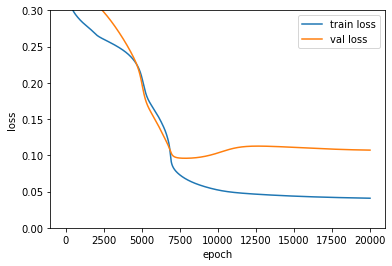

In [56]:

plt.ylim(0,0.3)
plt.plot(dual_layer.losses)
plt.plot(dual_layer.val_losses)
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train loss', 'val loss'])
plt.show()

In [57]:
class RandomInitNetwork(DualLayer):
    def init_weights(self, n_features):
        np.random.seed(42)
        self.w1=np.random.normal(0,1,(n_features, self.units))
        self.b1=np.zeros(self.units)
        self.w2=np.random.normal(0,1,(self.units,1))
        self.b2=0


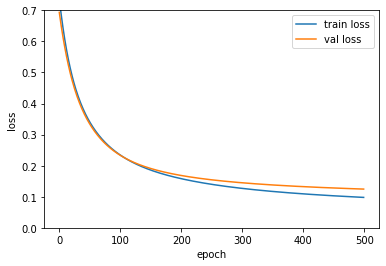

In [58]:
random_init_net=RandomInitNetwork(l2=0.01)
random_init_net.fit(x_train_scaled, y_train, x_val=x_val_scaled, y_val=y_val, epochs=500)
plt.ylim(0,0.7)
plt.plot(random_init_net.losses)
plt.plot(random_init_net.val_losses)
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train loss', 'val loss'])
plt.show()

In [66]:

class MinibatchNetwork(RandomInitNetwork):
    def __init__(self, units=10, batch_size=32, learning_rate=0.1, l1=0,l2=0):
        super().__init__(units,learning_rate, l1, l2)
        self.batch_size=batch_size
    def fit(self,x,y,epochs=100,x_val=None, y_val=None):
        y_val=y_val.reshape(-1,1) 
        self.init_weights(x.shape[1])
        np.random.seed(42)
        for i in range (epochs):
            loss=0
            for x_batch, y_batch in self.gen_batch(x,y):
                y_batch=y_batch.reshape(-1,1)
                m=len(x_batch)
                a=self.training(x_batch,y_batch,m)
                a=np.clip(a, 1e-10, 1-1e-10)
                loss+=np.sum(-(y_batch*np.log(a)+(1-y_batch)*np.log(1-a))) 
            self.losses.append((loss+self.reg_loss())/len(x))
            self.update_val_loss(x_val,y_val)
    def gen_batch(self,x,y):
        length=len(x)
        bins=length//self.batch_size
        if length % self.batch_size:
            bins+=1
        indexes=np.random.permutation(np.arange(len(x)))
        x=x[indexes]
        y=y[indexes]
        for i in range(bins):
            start=self.batch_size*i
            end=self.batch_size*(i+1)
            yield x[start:end], y[start:end]

0.978021978021978


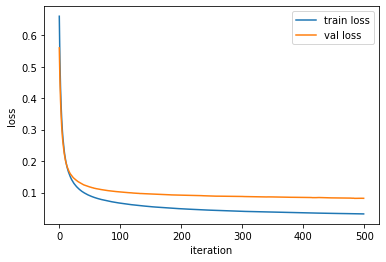

In [67]:

minibatch_net=MinibatchNetwork(l2=0.01, batch_size=32)
minibatch_net.fit(x_train_scaled, y_train, x_val=x_val_scaled, y_val=y_val, epochs=500)
print(minibatch_net.score(x_val_scaled,y_val))
plt.plot(minibatch_net.losses)
plt.plot(minibatch_net.val_losses)
plt.xlabel('iteration')
plt.ylabel('loss')
plt.legend(['train loss', 'val loss'])
plt.show()

0.978021978021978


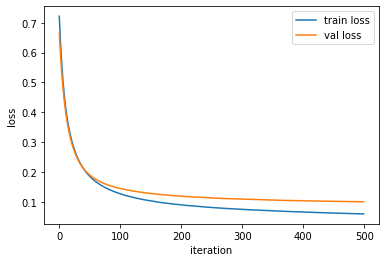

In [68]:
minibatch_net=MinibatchNetwork(l2=0.01, batch_size=128)
minibatch_net.fit(x_train_scaled, y_train, x_val=x_val_scaled, y_val=y_val, epochs=500)
minibatch_net.score(x_val_scaled,y_val)
print(minibatch_net.score(x_val_scaled,y_val))
plt.plot(minibatch_net.losses)
plt.plot(minibatch_net.val_losses)
plt.xlabel('iteration')
plt.ylabel('loss')
plt.legend(['train loss', 'val loss'])
plt.show()

In [69]:
from sklearn.neural_network import MLPClassifier
mlp=MLPClassifier(hidden_layer_sizes=(10,), activation='logistic', solver='sgd', 
                  alpha=0.01, batch_size=32, learning_rate_init=0.1, max_iter=500)

In [70]:

mlp.fit(x_train_scaled, y_train)
mlp.score(x_val_scaled, y_val)

0.989010989010989